# User-defined functions in Python


## Functions review

**User-Defined functions** are a powerful tool in python that allow us to create a section of code to complete a specific task which we can call & run whenever we choose in our program. Python functions are considered **objects**, which in this case simply means it is a specific method that can be called by its name. Functions take inputs called **arguments** and can **return** data output as well. 

One of the perks of functions is that they allow us to reduce the bulk in our code. We can repeat larger sections of code throughout our program whenever that task needs to be completed. This makes code more readable for humans & makes tasks more easily repeatable. 

## Input arguments 

Lets create a simple function that capitalizes all letters in a given string & prints the output. The syntax to create your own function is as follows:

In [5]:
def make_caps(input_string):
    new_word = input_string.upper()
    print(new_word)

To use our function we have to **call** it & provide it with the appropriate input arguments. 

Let's do that now by setting our `input_string` to a string we want to campitalize, then do so using our function. The beauty of a function is that you can reuse it an infinite amount of times to repeat a certain task on various input arguments. 

In [6]:
# run function with an input argument
make_caps(input_string = 'hockey')

# run function with a different input argument 
make_caps(input_string = 'let\'s go rangers')

HOCKEY
LET'S GO RANGERS


<hr style="border:2px solid gray"> </hr>

### Now you try! 

Make a function called `make_lowercase` that will print an input string in all *lowercase* letters. 

Use this new function to print out `Get THE pUcK in THE NET` in all lowercase letters. 

In [11]:
### BEGIN SOLUTION 

def make_lowercase(input_string):
    print(input_string.lower()) 

make_lowercase(input_string = 'Get THE pUcK in THE NET')

### END SOLUTION 

get the puck in the net


<hr style="border:2px solid gray"> </hr>

## Bringing in some data 

Now that we remember the basic mechanics of user-defined functions in Python, let's bring in some data we can work with to explore further. 

We will read in the following csv files: 
        `artemi-panarin.csv`
        `alex-ovetchkin.csv`
        `pk-subban.csv`
        
Which contain career summaries by season for these three National Hockey League (NHL) players, obtained [here](https://moneypuck.com/data.htm). The format for all three files is the same. There is a huge number of columns, but we are only interested in these:

- `season` - season year
- `name` - player name
- `team` - NHL team they played on for that season 
- `position` - player position on the ice
- `situation`	- in-game situation (e.g. 5 on 5 means 5 players from each team are facing off) 
- `games_played` - total number of games played that season 
- `icetime` - total amount of ice time (minutes) that season 
- `shifts` - number of 'shifts' the player took during the season - in other words the number of times the player got on the ice. Hockey players play in "shifts" that are only about a minute long, so they are taking on/off the ice very frequently in a single game. 
- `gameScore` - a statistic used to calculate how effective/productive a player was during a particular game 
    

In [32]:
# import pandas to our workspace 
import pandas as pd 

# use read_csv to read in the files 
panarin = pd.read_csv('artemi-panarin.csv')
subban = pd.read_csv('pk-subban.csv')
ovechkin = pd.read_csv('alex-ovechkin.csv')

In [33]:
# print a preview of one dataframe 
panarin.head()

,playerId,season,name,team,position,situation,games_played,icetime,shifts,gameScore,...,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
0,8478550,2015,Artemi Panarin,CHI,L,other,80,4417.0,78.0,62.63,...,16.57,15.54,117.0,148.0,0.05,0.02,2.0,1.0,2.0,1.0
1,8478550,2015,Artemi Panarin,CHI,L,all,80,88852.0,1820.0,72.22,...,140.63,158.55,2920.0,3291.0,0.00,0.00,0.0,0.0,0.0,0.0
2,8478550,2015,Artemi Panarin,CHI,L,5on5,80,71724.0,1532.0,72.22,...,101.44,105.96,2472.0,2454.0,1.78,1.59,31.0,48.0,26.0,38.0
3,8478550,2015,Artemi Panarin,CHI,L,4on5,80,52.0,5.0,1.40,...,0.40,3.52,7.0,59.0,0.00,0.00,0.0,0.0,0.0,0.0
4,8478550,2015,Artemi Panarin,CHI,L,5on4,80,12659.0,205.0,72.22,...,13.29,1.29,227.0,17.0,0.18,0.00,3.0,1.0,2.0,0.0


## Creating a function to clean up our dataframes 

You can see that there are a whopping 154 columns! But we only want to keep the few we listed above. Since we know the dataframes are all formatted the same way, we can create **one common function** that could be applied to any of the three dataframes (and by extension the data from any player obtained from MonkeyPuck!) 

Let's create a function that will take the input dataframe `input_df`, select only the desired columns which we will save in a list called `cols_to_keep`, and **return** a cleaned up version of the dataframe. We will name this function `clean_player_data`. 

Pandas syntax is such that a list of column names in square brackets will return *only* the columns with names in our list. 

In [36]:
# define our function 
def clean_player_data(input_df, cols_to_keep):
    output_df = input_df[cols_to_keep]
    return output_df 

In [37]:
# create our list of columns to keep 
cols_to_keep = ['season', 'name', 'team', 'position', 
                  'situation', 'games_played', 'icetime', 'shifts', 'gameScore']

# run the funciton on a player's dataframe & save to a new dataframe 
panarin_clean = clean_player_data(input_df = panarin, cols_to_keep = cols_to_keep)
panarin_clean.head()

,season,name,team,position,situation,games_played,icetime,shifts,gameScore
0,2015,Artemi Panarin,CHI,L,other,80,4417.0,78.0,62.63
1,2015,Artemi Panarin,CHI,L,all,80,88852.0,1820.0,72.22
2,2015,Artemi Panarin,CHI,L,5on5,80,71724.0,1532.0,72.22
3,2015,Artemi Panarin,CHI,L,4on5,80,52.0,5.0,1.40
4,2015,Artemi Panarin,CHI,L,5on4,80,12659.0,205.0,72.22


In [41]:
# now the apply the function to the other two players 
ovechkin_clean = clean_player_data(input_df = ovechkin, cols_to_keep = cols_to_keep)
ovechkin_clean.head()

,season,name,team,position,situation,games_played,icetime,shifts,gameScore
0,2008,Alex Ovechkin,WSH,L,other,79,5714.0,91.0,130.30
1,2008,Alex Ovechkin,WSH,L,all,79,109042.0,1694.0,139.29
2,2008,Alex Ovechkin,WSH,L,5on5,79,75344.0,1280.0,139.29
3,2008,Alex Ovechkin,WSH,L,4on5,79,4359.0,137.0,114.69
4,2008,Alex Ovechkin,WSH,L,5on4,79,23625.0,186.0,139.29


In [42]:
subban_clean = clean_player_data(input_df = subban, cols_to_keep = cols_to_keep)
subban_clean.head()

,season,name,team,position,situation,games_played,icetime,shifts,gameScore
0,2009,P.K. Subban,MTL,D,other,2,108.0,2.0,2.80
1,2009,P.K. Subban,MTL,D,all,2,2412.0,49.0,2.80
2,2009,P.K. Subban,MTL,D,5on5,2,1861.0,40.0,2.80
3,2009,P.K. Subban,MTL,D,4on5,2,48.0,1.0,1.48
4,2009,P.K. Subban,MTL,D,5on4,2,395.0,6.0,2.80


Great! We see this function works when we input any of our three dataframes. It takes our two input arguemnts and returns a new dataframe we save as a new variable. 

## Functions to help us filter our data

We've used a function to clean up our dataframes, so let's now create some functions to do a bit of analysis! 

Let's create a function we can use to isolate data for different values in the `situation` column. The values in this column describe different situations in gameplay. Let's look at the unique values in the column first. 

In [74]:
panarin.situation.unique()

array(['other', 'all', '5on5', '4on5', '5on4'], dtype=object)

For some context, a value of `5on5` this is the typical gameplay situation. If it is `4on5` or `5on4`, it indicates a "power play" where players are removed due to a penalty, and as aresult one team has less players on the ice for a certain period of time. `all` is any situation, and `other` is any situation that doesn't fall into any of the categories. 

We will design a function `get_situation` where it isolates the `target_sitution` (any unique value from the `situation` column) from our `input_dataframe`. 

In [75]:
def get_situation(input_dataframe, target_situation):
    output_dataframe = input_dataframe[input_dataframe['situation'] == target_situation]
    return output_dataframe

In [76]:
# test function 
get_situation(panarin_clean, '5on5')

,season,name,team,position,situation,games_played,icetime,shifts,gameScore
2,2015,Artemi Panarin,CHI,L,5on5,80,71724.0,1532.0,72.22
7,2016,Artemi Panarin,CHI,L,5on5,82,76750.0,1553.0,82.91
12,2017,Artemi Panarin,CBJ,L,5on5,81,79726.0,1636.0,95.93
17,2018,Artemi Panarin,CBJ,L,5on5,79,76242.0,1582.0,91.95
22,2019,Artemi Panarin,NYR,L,5on5,69,66460.0,1264.0,86.75
27,2020,Artemi Panarin,NYR,L,5on5,42,37258.0,747.0,49.52
32,2021,Artemi Panarin,NYR,L,5on5,75,69318.0,1280.0,79.58


We can do something similar where we create another function that isolates a particular team from that player's history. Let's print out the possible options. 

In [103]:
print('Andrei Panarin has played for these teams: ' + str(panarin_clean.team.unique()))
print('Alex Ovechkin  has played for these teams: ' + str(ovechkin_clean.team.unique()))
print('P.K. Subban has played for these teams: ' + str(subban_clean.team.unique()))

Andrei Panarin has played for these teams: ['CHI' 'CBJ' 'NYR']
Alex Ovechkin  has played for these teams: ['WSH']
P.K. Subban has played for these teams: ['MTL' 'NSH' 'NJD']


And now let's design our function & test it. 

In [77]:
def get_team(input_dataframe, target_team):
    output_dataframe = input_dataframe[input_dataframe['team'] == target_team]
    return output_dataframe

In [79]:
# test it 
get_team(subban_clean, 'NJD')

,season,name,team,position,situation,games_played,icetime,shifts,gameScore
60,2021,P.K. Subban,NJD,D,other,77,2409.0,54.0,19.00
61,2021,P.K. Subban,NJD,D,all,77,84528.0,1755.0,26.15
62,2021,P.K. Subban,NJD,D,5on5,77,75553.0,1538.0,26.15
63,2021,P.K. Subban,NJD,D,4on5,77,3916.0,104.0,20.93
64,2021,P.K. Subban,NJD,D,5on4,77,2650.0,59.0,12.13


Hm we've found something odd! P.K. Subban was traded to the NJD (Jersey Devils) in 2019 but the function is only returning values from the 2021 season. What happened to 2019 and 2020's data? Is it possible our function doesn't work? Or is there an underlying problem in our dataframe? Let's check these years in our dataframe. 

We will do this by isolating when the season was 2019 OR (`|`) 2020. 

In [95]:
subban_clean[(subban_clean['season'] == 2019) | (subban_clean['season'] == 2020)]

,season,name,team,position,situation,games_played,icetime,shifts,gameScore
50,2019,P.K. Subban,N.J,D,other,68,4115.0,77.0,12.78
51,2019,P.K. Subban,N.J,D,all,68,90178.0,1883.0,16.57
52,2019,P.K. Subban,N.J,D,5on5,68,70582.0,1504.0,16.57
53,2019,P.K. Subban,N.J,D,4on5,68,6385.0,151.0,14.20
54,2019,P.K. Subban,N.J,D,5on4,68,9096.0,151.0,15.73
55,2020,P.K. Subban,N.J,D,other,44,2745.0,40.0,21.70
56,2020,P.K. Subban,N.J,D,all,44,59073.0,1151.0,22.98
57,2020,P.K. Subban,N.J,D,5on5,44,47291.0,927.0,22.98
58,2020,P.K. Subban,N.J,D,4on5,44,3861.0,93.0,20.40
59,2020,P.K. Subban,N.J,D,5on4,44,5176.0,91.0,21.78


Interesting! P.K. Subban is shown to have played for 'N.J', but that's not a proper team abbreviation. The value *should be* 'NJD' - we just found a typo in our dataset! Let's replace this using pandas `.replace()` method. 

This method takes the value to be replaced, followed by the value to replace it with. We add `inplace = True` to indicate we want this change to be saved to our dataframe. 

In [102]:
subban_clean.replace('N.J', 'NJD', inplace = True)

get_team(subban_clean, 'NJD')

/Users/sofiarocco/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,season,name,team,position,situation,games_played,icetime,shifts,gameScore
50,2019,P.K. Subban,NJD,D,other,68,4115.0,77.0,12.78
51,2019,P.K. Subban,NJD,D,all,68,90178.0,1883.0,16.57
52,2019,P.K. Subban,NJD,D,5on5,68,70582.0,1504.0,16.57
53,2019,P.K. Subban,NJD,D,4on5,68,6385.0,151.0,14.20
54,2019,P.K. Subban,NJD,D,5on4,68,9096.0,151.0,15.73
55,2020,P.K. Subban,NJD,D,other,44,2745.0,40.0,21.70
56,2020,P.K. Subban,NJD,D,all,44,59073.0,1151.0,22.98
57,2020,P.K. Subban,NJD,D,5on5,44,47291.0,927.0,22.98
58,2020,P.K. Subban,NJD,D,4on5,44,3861.0,93.0,20.40
59,2020,P.K. Subban,NJD,D,5on4,44,5176.0,91.0,21.78


Great! Now we fixed it & can use our function properly. This is an instance of **troubleshooting issues** during data analysis. Sometimes the issue is with the design/syntax within the function itself, and other times it is your function not being able to catch an issue in the underlying data as in this case. 

Oftentimes, we can get to the bottom of most problems by querying our dataframes and printing out the contents.

<hr style="border:2px solid gray"> </hr>

### Now you try! 

Use `get_team` to isolate the data for years that Andrei Panarin played on the New York Rangers (NYR) and save this to a dataframe called `panarin_nyr`. Print out the unique years that Panarin played on the NYR. 

In [109]:
### BEGIN SOLUTION 

panarin_nyr = get_team(panarin_clean, 'NYR')
panarin_nyr.season.unique()

### GET SOLUTION 

array([2019, 2020, 2021])

<hr style="border:2px solid gray"> </hr>

## Nesting functions 

Each of these functions we created are helpful for querying our dataframes & returning filtered versions. This is a really useful step in analysis! But you will usually want to **actually do something** with the filtered data, not just return it. 

We can use the functions we've created **nested within** another function to complete some larger analysis task! 

Let's create a function called `plot_icetime`. In this function we will do a few things: 
- first use `get_situation` to isolate a particular situation 
- then use `get_team` to isolate when a player was on a particular team - this **must** be done using the output of `get_situation` so **both** filters are applied on the resulting dataframe!  
- add a new column called `icetime_min` that contains the icetime in minutes (`icetime` is given in seconds, so divide this by 60 to get icetime in minutes). 
- create a variable named `plot_title` where we build a string based on the unique inputs for our plot title 
- create a bar plot with `season` on the x axis, and `icetime` on the y axis, where the height of each bar is the number of icetime in minutes 

In [194]:
def plot_icetime(input_dataframe, target_situation, target_team):
    # apply first filter - situation 
    filter_df_first = get_situation(input_dataframe, target_situation) 
    # apply second filter - team (input is output of first filter)
    filter_df_second = get_team(filter_df_first, target_team)
    # get icetime in minutes 
    filter_df_second['icetime_min'] = filter_df_second['icetime']/60
    # create a title for the plot using the unique inputs (player name, situation, team)
    plot_title = str(filter_df_second.name.unique()[0]) + ' ' + target_situation + ' icetime on the ' + target_team
    # create a bar plot 
    filter_df_second.plot.bar(x='season', y='icetime_min', title = plot_title, ylabel = 'icetime [minutes]')
    # return the filtered df 
    return filter_df_second

<ipython-input-194-c8ec2a6bb4cc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_df_second['icetime_min'] = filter_df_second['icetime']/60


,season,name,team,position,situation,games_played,icetime,shifts,gameScore,icetime_min
22,2019,Artemi Panarin,NYR,L,5on5,69,66460.0,1264.0,86.75,1107.666667
27,2020,Artemi Panarin,NYR,L,5on5,42,37258.0,747.0,49.52,620.966667
32,2021,Artemi Panarin,NYR,L,5on5,75,69318.0,1280.0,79.58,1155.300000


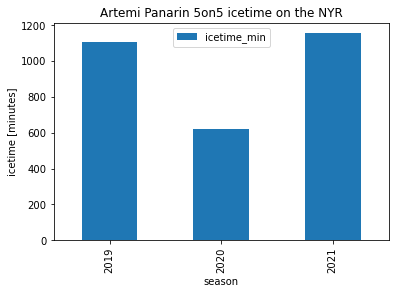

In [195]:
plot_icetime(panarin_clean, '5on5', 'NYR')

We see that our function works! It returns a new dataframe that contains Panrin's stats in 5-on-5 play situations while he played on the Rangers. We also have a bar plot showing icetime in minutes. 

We can use this function to analyze & plot any combination of players we have stats for, particular play situations, and when they were on a certain team. From this we learned Panarin had comprable amount of ice time in 2019 and 2021, but his icetime was nearly halved in 2020. 

<hr style="border:2px solid gray"> </hr>

### Now you try! 

We assume this function should work with any player, situation, and team combination. Use `plot_icetime` to create a bar plot that shows Alex Ovechkin's play time in `all` situations while on the Ottowa Senators (team abbreviation `OTT`). 

Does the function work? Why or why not?

In [198]:
### BEGIN SOLUTION 

plot_icetime(ovechkin_clean, 'all', 'OTT')

# this function does not work because Ovechkin never played on OTT! 
# The function fails to build a plot title & plot because the filtered dataframe is empty. 

### END SOLUTION 

IndexError: index 0 is out of bounds for axis 0 with size 0

<hr style="border:2px solid gray"> </hr>

## Debugging functions 

Sometimes a function doesn't work and we have to figure out why. Previously we showed an example of a problem in the underlying dataframe, but most often it will be an issue with the function itself. Sometimes a function will not work allotgether or sometimes it will only work in particular situations. 

In cases such as this, we have to go in and figure out why our function is failing. Let's debug `plot_icetime`. The simplest way to do this is by **adding print statements** at different stages in the function to see what step in the function fails!

We need to embed these print/return statements within the function as local function variables (such as `filter_df_first` do not exist in our global variable space. We can use `print` or return `return` to print our local function variables. 

Let's add `return filter_df_first` right after we define it in our function to check the output. 

In [210]:
def plot_icetime(input_dataframe, target_situation, target_team):
    # apply first filter - situation 
    filter_df_first = get_situation(input_dataframe, target_situation) 
    return filter_df_first
    # apply second filter - team (input is output of first filter)
    filter_df_second = get_team(filter_df_first, target_team)
    # get icetime in minutes 
    filter_df_second['icetime_min'] = filter_df_second['icetime']/60
    # create a title for the plot using the unique inputs (player name, situation, team)
    plot_title = str(filter_df_second.name.unique()[0]) + ' ' + target_situation + ' icetime on the ' + target_team
    # create a bar plot 
    filter_df_second.plot.bar(x='season', y='icetime_min', title = plot_title, ylabel = 'icetime [minutes]')
    # return the filtered df 
    return filter_df_second
    
plot_icetime(ovechkin_clean, 'all', 'OTT')

,season,name,team,position,situation,games_played,icetime,shifts,gameScore
1,2008,Alex Ovechkin,WSH,L,all,79,109042.0,1694.0,139.29
6,2009,Alex Ovechkin,WSH,L,all,72,94165.0,1420.0,129.58
11,2010,Alex Ovechkin,WSH,L,all,79,100534.0,1704.0,101.01
16,2011,Alex Ovechkin,WSH,L,all,78,92605.0,1651.0,66.34
21,2012,Alex Ovechkin,WSH,L,all,48,60147.0,1026.0,56.99
26,2013,Alex Ovechkin,WSH,L,all,78,96152.0,1700.0,80.91
31,2014,Alex Ovechkin,WSH,L,all,81,98784.0,1816.0,99.51
36,2015,Alex Ovechkin,WSH,L,all,79,96262.0,1714.0,92.30
41,2016,Alex Ovechkin,WSH,L,all,81,89312.0,1721.0,73.97
46,2017,Alex Ovechkin,WSH,L,all,82,98485.0,1723.0,92.00


Okay, so far so good... the function is returning all values where the `situation` column equals `all`. The issue is not in this step. 

Let's remove that return statement, and add another to print `filter_df_second`. 

In [215]:
def plot_icetime(input_dataframe, target_situation, target_team):
    # apply first filter - situation 
    filter_df_first = get_situation(input_dataframe, target_situation) 
    # apply second filter - team (input is output of first filter)
    filter_df_second = get_team(filter_df_first, target_team)
    return filter_df_second
    # get icetime in minutes 
    filter_df_second['icetime_min'] = filter_df_second['icetime']/60
    # create a title for the plot using the unique inputs (player name, situation, team)
    plot_title = str(filter_df_second.name.unique()[0]) + ' ' + target_situation + ' icetime on the ' + target_team
    # create a bar plot 
    filter_df_second.plot.bar(x='season', y='icetime_min', title = plot_title, ylabel = 'icetime [minutes]')
    # return the filtered df 
    return filter_df_second
    
plot_icetime(ovechkin_clean, 'all', 'OTT')

,season,name,team,position,situation,games_played,icetime,shifts,gameScore


Uh oh! Here's the problem! `get_team` for the input target team `OTT` returns and **empty dataframe**! 

This is because Ovechkin never played for Ottowa! The nested `get_team` filter works properly, but its result causes our `plot_icetime` function to break at the step where we get the player's full name out of the dataframe, `filter_df_second.name.unique()[0]`.  The list is empty! 

## Building more resilient functions 

The function in it's current state fails given certain inputs. But we can make some simple changes to ensure that it doesn't fail, and if a problem arises we can be warned so we don't have to go hunting for the issue. 

We can use a combination of **conditionals** and **print statements** to build a more resillient function that won't break even if we feed it faulty inputs (within reason). 

We will add the following to `plot_icetime`: 

- a conditional to check if the output of `get_situation` is empty - if it is empty, use `return` to break the function and print a statement that lets us know what happened
- a conditional to check if the output of `get_team` is empty - if it is empty, use `return` to break the function and print a statement that lets us know what happened

In [225]:
def plot_icetime(input_dataframe, target_situation, target_team):
    # apply first filter - situation 
    filter_df_first = get_situation(input_dataframe, target_situation) 
    if len(filter_df_first) == 0:
        print('The situation "' + target_situation + '" does not exist in the input dataframe!')
        return 
    # apply second filter - team (input is output of first filter)
    filter_df_second = get_team(filter_df_first, target_team)
    if len(filter_df_second) == 0:
        print('The team "' + target_team + '" does not exist in the input dataframe!')
        return
    # get icetime in minutes 
    filter_df_second['icetime_min'] = filter_df_second['icetime']/60
    # create a title for the plot using the unique inputs (player name, situation, team)
    plot_title = str(filter_df_second.name.unique()[0]) + ' ' + target_situation + ' icetime on the ' + target_team
    # create a bar plot 
    filter_df_second.plot.bar(x='season', y='icetime_min', title = plot_title, ylabel = 'icetime [minutes]')
    # return the filtered df 
    return filter_df_second
    
plot_icetime(ovechkin_clean, 'all', 'OTT')

The team "OTT" does not exist in the input dataframe!


Now we have a resilient function that doesn't fail even if the user tries to query for something that doesn't exist, or makes a typo in the input arguments! 

In [231]:
plot_icetime(ovechkin_clean, 'one man on the ice', 'WSH')

The situation "one man on the ice" does not exist in the input dataframe!


In [230]:
plot_icetime(subban_clean, '4on5', 'Pittsburg Penguins')

The team "Pittsburg Penguins" does not exist in the input dataframe!


<hr style="border:2px solid gray"> </hr>

# Practice on your own 

In this practice section you will work with data in the file `goalies.csv`, which contains stats on NHL goalies in the 2020 season. A file like this is produced at the end of every season, so we want to create a set of functions to be able to repeat this analysis every year. 

#### Exercise 1. Read in `goalies.csv` and take a look at the contents

In [234]:
goalies = pd.read_csv('goalies.csv')
goalies.head()

,playerId,season,name,team,position,situation,games_played,icetime,xGoals,goals,...,highDangerShots,lowDangerxGoals,mediumDangerxGoals,highDangerxGoals,lowDangerGoals,mediumDangerGoals,highDangerGoals,blocked_shot_attempts,penalityMinutes,penalties
0,8470147,2020,Curtis McElhinney,T.B,G,other,12,1310.0,2.74,1.0,...,2.0,0.81,1.10,0.83,0.0,1.0,0.0,8.0,0.0,0.0
1,8470147,2020,Curtis McElhinney,T.B,G,all,12,43159.0,26.49,37.0,...,20.0,8.04,11.12,7.33,12.0,17.0,8.0,114.0,2.0,1.0
2,8470147,2020,Curtis McElhinney,T.B,G,5on5,12,33877.0,16.25,29.0,...,10.0,5.87,7.75,2.63,10.0,15.0,4.0,85.0,2.0,1.0
3,8470147,2020,Curtis McElhinney,T.B,G,4on5,12,3543.0,6.25,6.0,...,8.0,1.11,1.27,3.87,2.0,0.0,4.0,19.0,0.0,0.0
4,8470147,2020,Curtis McElhinney,T.B,G,5on4,12,4429.0,1.25,1.0,...,0.0,0.25,1.00,0.00,0.0,1.0,0.0,2.0,0.0,0.0


#### Exercise 2. In general, it is pretty rare for a goalie to take a penalty. Create a function called `find_penalties` that isolates the goalies with non-zero values in the `penalties` column & returns their names in a variable called `goalies_with_penalties`. Then, print the names of the goalies with penalties, and print a statement that tells us the percentage of total goalies that took penalities. 

    percentage = (number of goalies with penalities / total number of goalies) * 100. 

In [259]:
### BEGIN SOLUTION 

# create function to find goalies with penalties
def find_penalites(input_dataframe):
    penalties_exist = input_dataframe[input_dataframe['penalties'] > 0]
    goalie_names = penalties_exist.name.unique()
    return goalie_names

# run function 
goalies_with_penalties = find_penalites(goalies)

# print goalie names 
print(goalies_with_penalties)

# print 
print(str(round((len(goalies_with_penalties)/len(goalies)*100), 2)) + '% of goalies took penalties in 2020')

### END SOLUTION 

['Curtis McElhinney' 'Juuse Saros' 'Devan Dubnyk' 'John Gibson'
 'Carter Hart' 'Matt Murray' 'Anton Khudobin' 'Tristan Jarry'
 'Darcy Kuemper' 'Thomas Greiss' 'Alex Nedeljkovic' 'Ville Husso'
 'Semyon Varlamov' 'Joonas Korpisalo' 'Kaapo Kahkonen' 'Marc-Andre Fleury'
 'Jacob Markstrom' 'Mike Smith' 'Jordan Binnington' 'Kevin Lankinen'
 'Jake Allen' 'Jake Oettinger']
4.49% of goalies took penalties in 2020


#### Exercise 3. Create a function called `get_most_icetime` that finds and returns the 10 goalies with the most ice time when the situation is `all`. Feel free to re-use the `get_situation` function we used in the guided section above as it will also work on this dataframe. You can use[ `.sort_values` ](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) to sort the goalies by the values in column `icetime` (remember the default is to sort in ascending order). 

In [301]:
def get_most_icetime(input_dataframe):
    goalies_situation_all = get_situation(goalies, 'all')
    goalies_sorted = goalies_situation_all.sort_values('icetime', ascending = False)
    goalies_most_icetime = goalies_sorted.iloc[0:10].reset_index(drop = True)
    return goalies_most_icetime

get_most_icetime(goalies)

,playerId,season,name,team,position,situation,games_played,icetime,xGoals,goals,...,highDangerShots,lowDangerxGoals,mediumDangerxGoals,highDangerxGoals,lowDangerGoals,mediumDangerGoals,highDangerGoals,blocked_shot_attempts,penalityMinutes,penalties
0,8476945,2020,Connor Hellebuyck,WPG,G,all,45,156169.0,131.25,112.0,...,132.0,38.44,52.86,39.96,28.0,50.0,34.0,598.0,0.0,0.0
1,8476883,2020,Andrei Vasilevskiy,T.B,G,all,42,151416.0,111.23,93.0,...,88.0,35.17,45.18,30.88,26.0,48.0,19.0,494.0,0.0,0.0
2,8474593,2020,Jacob Markstrom,CGY,G,all,43,149193.0,101.74,111.0,...,92.0,32.51,38.13,31.11,32.0,44.0,35.0,510.0,2.0,1.0
3,8476412,2020,Jordan Binnington,STL,G,all,42,146860.0,108.08,108.0,...,109.0,34.97,36.23,36.87,36.0,39.0,33.0,541.0,2.0,1.0
4,8475831,2020,Philipp Grubauer,COL,G,all,40,142008.0,82.24,77.0,...,87.0,27.29,27.30,27.64,30.0,27.0,20.0,466.0,0.0,0.0
5,8477465,2020,Tristan Jarry,PIT,G,all,39,131118.0,88.24,100.0,...,88.0,29.80,31.24,27.21,34.0,34.0,32.0,433.0,8.0,4.0
6,8480947,2020,Kevin Lankinen,CHI,G,all,37,130489.0,94.71,109.0,...,85.0,33.68,32.45,28.57,39.0,31.0,39.0,506.0,2.0,1.0
7,8470594,2020,Marc-Andre Fleury,VGK,G,all,36,128796.0,88.92,71.0,...,95.0,29.09,30.91,28.92,20.0,30.0,21.0,514.0,2.0,1.0
8,8473575,2020,Semyon Varlamov,NYI,G,all,36,127016.0,74.69,72.0,...,49.0,31.03,27.76,15.90,27.0,30.0,15.0,520.0,2.0,1.0
9,8477970,2020,Vitek Vanecek,WSH,G,all,37,126929.0,87.72,95.0,...,81.0,30.84,29.40,27.47,36.0,34.0,25.0,426.0,0.0,0.0


#### Exercise 4. Generalize the function you made in exercise 3 so it can find the goalies with the most ice time in any given `target_situation` (all, other, 5on5, ...). Make sure the `get_situation` function is properly nested in `get_most_icetime`. Use this function to find the 10 goalies with most ice time in `4on5` situations. 

In [303]:
### BEGIN SOLUTION 

def get_most_icetime(input_dataframe, target_situation):
    goalies_situation_all = get_situation(goalies, target_situation)
    goalies_sorted = goalies_situation_all.sort_values('icetime', ascending = False)
    goalies_most_icetime = goalies_sorted.iloc[0:10].reset_index(drop = True)
    return goalies_most_icetime

get_most_icetime(goalies, '4on5')

### END SOLUTION 

,playerId,season,name,team,position,situation,games_played,icetime,xGoals,goals,...,highDangerShots,lowDangerxGoals,mediumDangerxGoals,highDangerxGoals,lowDangerGoals,mediumDangerGoals,highDangerGoals,blocked_shot_attempts,penalityMinutes,penalties
0,8476883,2020,Andrei Vasilevskiy,T.B,G,4on5,42,13468.0,21.70,21.0,...,23.0,4.63,4.35,12.72,4.0,7.0,10.0,74.0,0.0,0.0
1,8475831,2020,Philipp Grubauer,COL,G,4on5,40,12183.0,17.33,16.0,...,24.0,3.83,3.46,10.04,6.0,3.0,7.0,85.0,0.0,0.0
2,8474593,2020,Jacob Markstrom,CGY,G,4on5,43,11774.0,20.80,23.0,...,24.0,2.95,6.28,11.58,2.0,8.0,13.0,92.0,2.0,1.0
3,8476945,2020,Connor Hellebuyck,WPG,G,4on5,45,11318.0,20.01,22.0,...,25.0,3.95,5.96,10.10,4.0,3.0,15.0,80.0,0.0,0.0
4,8477967,2020,Thatcher Demko,VAN,G,4on5,35,11160.0,18.71,21.0,...,22.0,3.85,4.36,10.50,5.0,3.0,13.0,59.0,0.0,0.0
5,8476412,2020,Jordan Binnington,STL,G,4on5,42,11108.0,18.87,21.0,...,22.0,3.88,4.76,10.23,4.0,5.0,12.0,54.0,0.0,0.0
6,8477970,2020,Vitek Vanecek,WSH,G,4on5,37,10090.0,15.04,15.0,...,19.0,3.32,2.99,8.73,3.0,2.0,10.0,58.0,0.0,0.0
7,8476434,2020,John Gibson,ANA,G,4on5,35,9955.0,17.20,20.0,...,19.0,3.47,2.50,11.22,2.0,3.0,15.0,67.0,0.0,0.0
8,8474889,2020,Martin Jones,S.J,G,4on5,34,9320.0,11.50,21.0,...,10.0,3.54,3.13,4.83,6.0,6.0,9.0,50.0,0.0,0.0
9,8478048,2020,Igor Shesterkin,NYR,G,4on5,35,9235.0,16.92,22.0,...,21.0,3.00,2.93,10.99,0.0,9.0,13.0,61.0,0.0,0.0


#### Exercise 5. Debug this function using print/return statements 

In [304]:
def 

SyntaxError: invalid syntax (<ipython-input-304-455680ca2399>, line 1)